In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Chargement du fichier csv
data = pd.read_csv("TB_ETUDIANT.csv", encoding='latin-1', delimiter=";")


#Appercu des données
print(data.head())

df = pd.DataFrame(data)

# Extraction des variables numériques

numeric_variables = ['MoyenneBac', 'NotesMaths', 'NotesFrançais', 'NotesPhysChimie', 'NotesSVT', 'NotesAnglais']
numeric_data = df[numeric_variables]

  ID_ETUDIANT Sexe  MoyenneBac  NotesMaths  NotesFrançais  NotesPhysChimie  \
0       ET001    F        15.0        16.0           16.0            12.75   
1       ET002    F        10.0         7.0           15.0            20.00   
2       ET003    F        10.0        14.0           17.0            17.00   
3       ET004    F        15.0         7.0           16.0            12.75   
4       ET005    F        12.0         9.0           13.0            19.00   

   NotesSVT  NotesAnglais     Interets1         Interets2  Orientation Licence  
0       8.0           6.0   agriculture  agro-alimentaire    agronomie     oui  
1      20.0          13.0        Chimie        sociologie     Biologie     oui  
2      17.0           9.0  Architecture     Mathematiques  Genie civil     oui  
3       8.0          19.0  Informatique        Multimedia  Agriculture     non  
4      19.0          15.0    sociologie        Sociologie     Medecine     oui  


In [11]:

# Descriptive statistics
summary_stats = data.describe()
print(summary_stats)

        MoyenneBac   NotesMaths  NotesFrançais  NotesPhysChimie     NotesSVT  \
count  1147.000000  1147.000000    1147.000000      1147.000000  1147.000000   
mean     12.621543    12.963819      13.812990        13.555798    13.620532   
std       2.095266     4.153023       3.451264         3.595546     3.631327   
min      10.000000     6.000000       8.000000         8.500000     7.000000   
25%      11.000000    10.000000      11.000000        10.000000    11.000000   
50%      12.000000    13.000000      13.000000        13.000000    13.000000   
75%      14.000000    16.000000      17.000000        17.000000    17.000000   
max      19.000000    20.000000      20.000000        20.000000    20.000000   

       NotesAnglais  
count   1147.000000  
mean      13.307323  
std        3.749161  
min        6.000000  
25%       11.000000  
50%       13.000000  
75%       17.000000  
max       19.000000  


In [12]:

# Exploration of missing data
missing_data = data.isnull().sum()
print(missing_data)


ID_ETUDIANT        0
Sexe               0
MoyenneBac         0
NotesMaths         0
NotesFrançais      0
NotesPhysChimie    0
NotesSVT           0
NotesAnglais       0
Interets1          0
Interets2          0
Orientation        1
Licence            0
dtype: int64


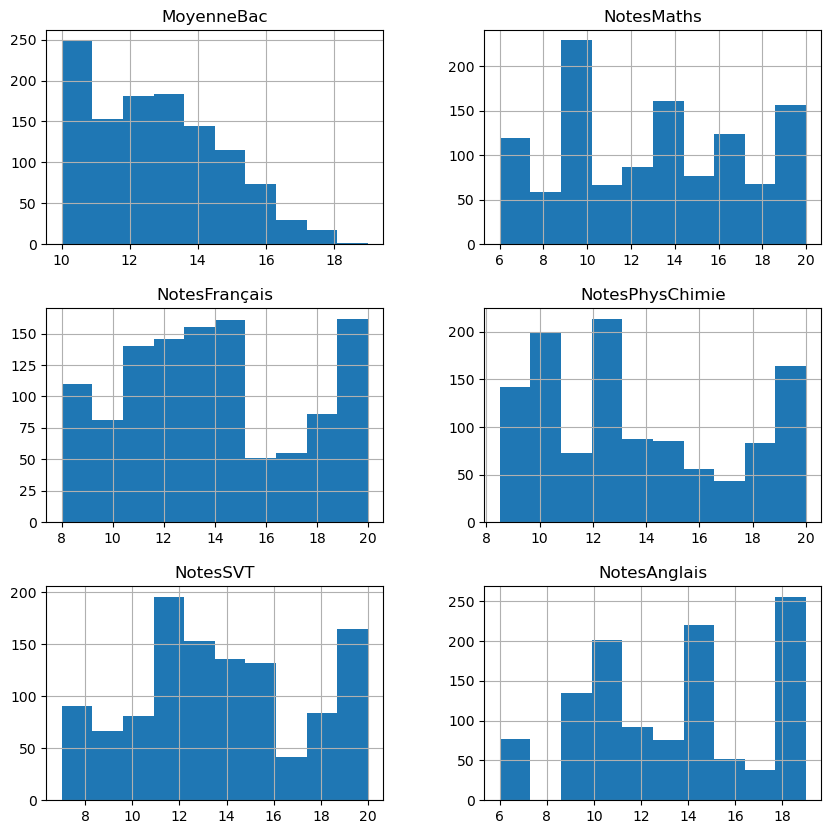

In [13]:
# Distribution of variables
data.hist(figsize=(10, 10))
plt.show()


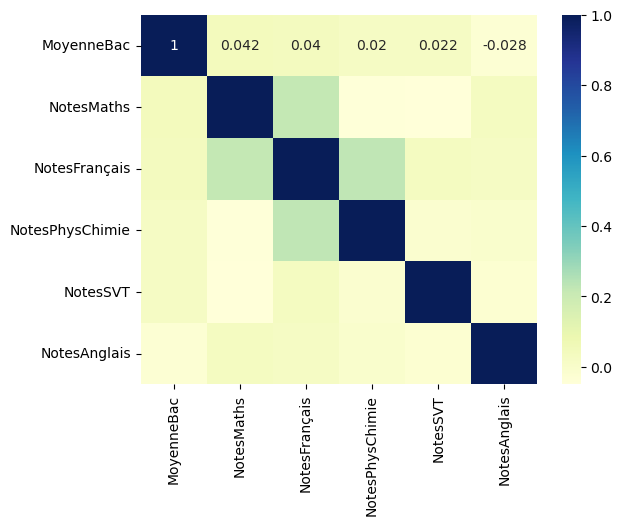

In [14]:

# Remove the column containing string values
data_numeric = data.select_dtypes(include=[np.number])

# Correlation analysis
correlation_matrix = data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

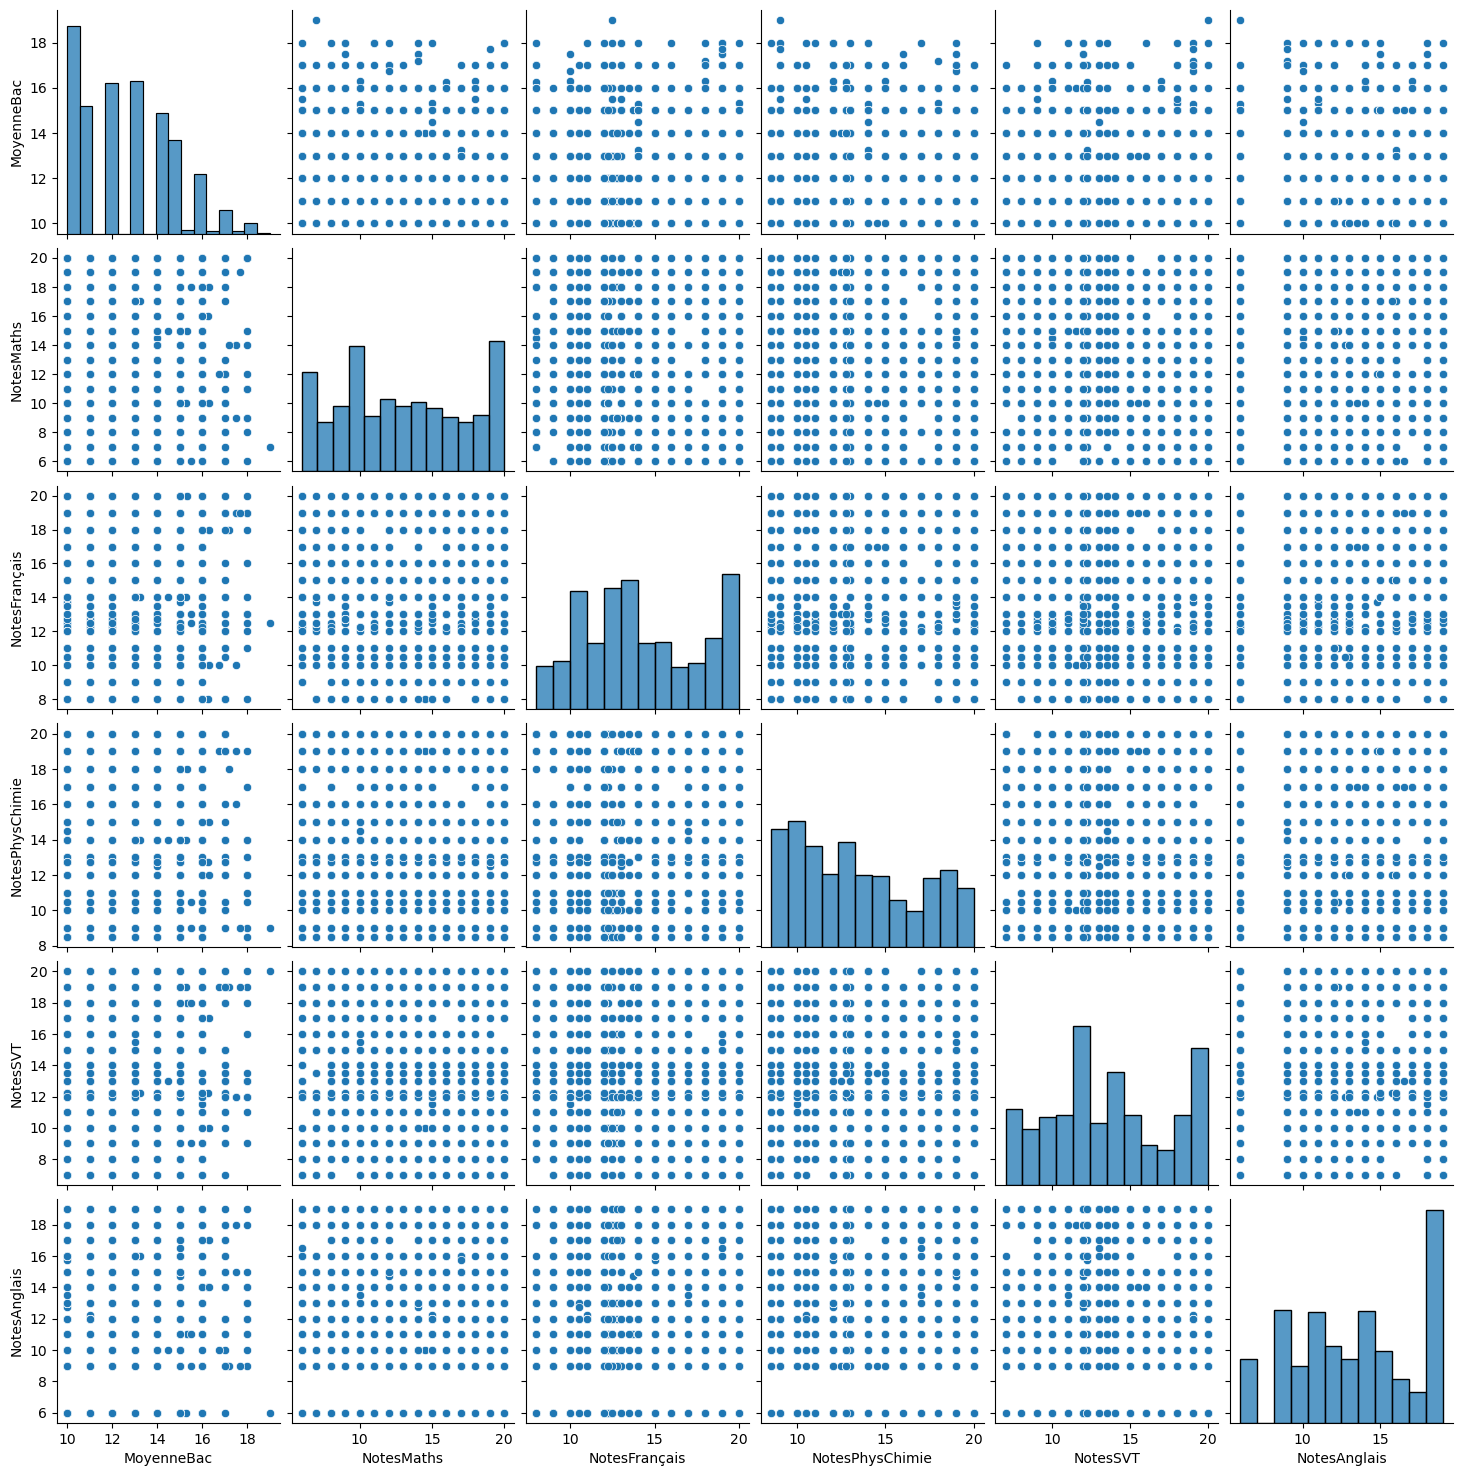

In [15]:
# Exploration of relationships between variables
sns.pairplot(data)
plt.show()

In [ ]:

# Identification of outliers
outliers = []
for column in data.columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers.append(column_outliers)
    
# Print outliers for each variable
for i, column in enumerate(data.columns):
    print(f"Outliers for {column}:")
    print(outliers[i])
    print()